### This project is analyzing TCGA Immune Infiltration data from TCGA and was originally proposed by Ming "Tommy" Tang. The link to the github repository is as follows:  https://github.com/immunitastx/coding_exercise_TCGA_infiltration. I will be answering each question proposed in said repository.

First we load in the required libraries to analyze the data. For this project I chose to use pandas and numpy to preprocess/ manipulate the data for visualization using matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotnine as p9
import seaborn as sns
from Bio import AlignIO

Here we load in our datasets, we can read them in either using the read_csv or read_table functions as long as we denoted the seperator/delimiter as "\t". 

In [2]:
all_leuk = pd.read_table('Python_Projects/TCGA_Immune_Infil/TCGA_all_leuk_estimate.masked.20170107.tsv', delimiter='\t', names=["CancerType", "SampleID","Infil"])
cibersort = pd.read_table('Python_Projects/TCGA_Immune_Infil/TCGA.Kallisto.fullIDs.cibersort.relative.tsv', delimiter='\t')

# Section 1

### Question 1.1:"Demonstrate that TCGA.Kallisto.fullIDs.cibersort.relative.tsv is relative immune cell abundance (Hint, all the immune cell type fractions sum up to 1)"

We can evalute this by summing all the values in each column on a per row basis as this should add up to approximately 1. 
Using the pandas.sum function and specifying to only analyze columns 2-25 (This removes the columns that aren't relevant to relative immune abundance such as p value) using .iloc to perform integer indexing we can obtain the float values of each samples total abundance. Its import to call axis=1 here as otherwise it would sum across the rows for each column (axis=0). 

In [38]:
cibersort.iloc[:,2:25].sum(axis=1)

0        1.112
1        1.104
2        1.068
3        1.388
4        1.246
         ...  
11368    1.090
11369    1.002
11370    1.086
11371    1.096
11372    1.318
Length: 11373, dtype: float64

   ### Question 1.2: "calculate the absolute immune infiltration by using the Leukocyte Fraction using TCGA_all_leuk_estimate.masked.20170107.tsv. when joining the two tables:
   ### - make sure you explore the two data tables to understand the TCGA barcode and identify the unique keys to combine the two datasets.
   ### -  There are some duplicated rows in the TCGA.Kallisto.fullIDs.cibersort.relative.tsv file, make sure you spot them."

If we look at the leukocyte data we can see that in column 0 we have the tumor type with column 1 having the TCGA barcode. Finally column 2 contains the aboslute value of leukocyte/immune cel infiltration. 

In [39]:
cibersort["SampleID"]

0        TCGA.OR.A5JG.01A.11R.A29S.07
1        TCGA.OR.A5LG.01A.11R.A29S.07
2        TCGA.OR.A5JD.01A.11R.A29S.07
3        TCGA.OR.A5LH.01A.11R.A29S.07
4        TCGA.OR.A5KY.01A.11R.A29S.07
                     ...             
11368    TCGA.V4.A9EQ.01A.11R.A405.07
11369    TCGA.V4.A9EV.01A.11R.A405.07
11370    TCGA.V4.A9EY.01A.11R.A405.07
11371    TCGA.V4.A9EU.01A.11R.A405.07
11372    TCGA.V4.A9EM.01A.11R.A405.07
Name: SampleID, Length: 11373, dtype: object

In [40]:
all_leuk["SampleID"]

0        TCGA-OR-A5J1-01A-11D-A29J-05
1        TCGA-OR-A5J2-01A-11D-A29J-05
2        TCGA-OR-A5J3-01A-11D-A29J-05
3        TCGA-OR-A5J4-01A-11D-A29J-05
4        TCGA-OR-A5J5-01A-11D-A29J-05
                     ...             
10812    TCGA-ZM-AA0D-01A-11D-A436-05
10813    TCGA-ZM-AA0E-01A-12D-A436-05
10814    TCGA-ZM-AA0F-01A-21D-A436-05
10815    TCGA-ZM-AA0H-01A-11D-A436-05
10816    TCGA-ZM-AA0N-01A-21D-A436-05
Name: SampleID, Length: 10817, dtype: object

To complete this task we must first remove the duplicate values in the cibersort data as pointed out in the question. This is a simple single command in pandas

In [41]:
cibersort.drop_duplicates()

,SampleID,CancerType,B.cells.naive,B.cells.memory,Plasma.cells,T.cells.CD8,T.cells.CD4.naive,T.cells.CD4.memory.resting,T.cells.CD4.memory.activated,T.cells.follicular.helper,...,Macrophages.M2,Dendritic.cells.resting,Dendritic.cells.activated,Mast.cells.resting,Mast.cells.activated,Eosinophils,Neutrophils,P.value,Correlation,RMSE
0,TCGA.OR.A5JG.01A.11R.A29S.07,ACC,0.000000,0.048529,0.016052,0.046099,0.027037,0.290682,0.0,0.000000,...,0.363861,0.002715,0.026125,0.032788,0.000000,0.010290,0.009607,0.112,0.095797,1.047142
1,TCGA.OR.A5LG.01A.11R.A29S.07,ACC,0.007169,0.011125,0.007982,0.139842,0.000000,0.142742,0.0,0.001614,...,0.448243,0.000000,0.007464,0.126237,0.000000,0.000000,0.000000,0.104,0.103345,1.046163
2,TCGA.OR.A5JD.01A.11R.A29S.07,ACC,0.000023,0.014607,0.000000,0.104888,0.000000,0.174895,0.0,0.017928,...,0.329552,0.000000,0.009330,0.000000,0.190730,0.000000,0.000000,0.068,0.143259,1.039812
3,TCGA.OR.A5LH.01A.11R.A29S.07,ACC,0.047299,0.038180,0.000000,0.198591,0.000000,0.065240,0.0,0.043310,...,0.287939,0.000000,0.000576,0.000000,0.064725,0.000000,0.000000,0.388,0.028763,1.080553
4,TCGA.OR.A5KY.01A.11R.A29S.07,ACC,0.000000,0.024795,0.004418,0.051506,0.000000,0.225892,0.0,0.000000,...,0.486400,0.000000,0.042827,0.000000,0.017418,0.014769,0.000000,0.246,0.055621,1.073474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11368,TCGA.V4.A9EQ.01A.11R.A405.07,UVM,0.000000,0.028939,0.008894,0.000000,0.023294,0.015676,0.0,0.002279,...,0.521353,0.009128,0.000000,0.208036,0.000000,0.000000,0.000000,0.090,0.111538,1.060529
11369,TCGA.V4.A9EV.01A.11R.A405.07,UVM,0.000000,0.013299,0.025069,0.315356,0.000000,0.017361,0.0,0.095233,...,0.163671,0.015558,0.000000,0.061707,0.000000,0.000000,0.000000,0.002,0.347125,0.952021
11370,TCGA.V4.A9EY.01A.11R.A405.07,UVM,0.000000,0.032507,0.076160,0.061400,0.034359,0.000000,0.0,0.007778,...,0.431568,0.004550,0.000000,0.227797,0.000000,0.000000,0.000000,0.086,0.113888,1.041876
11371,TCGA.V4.A9EU.01A.11R.A405.07,UVM,0.000000,0.021228,0.010225,0.067985,0.003434,0.006675,0.0,0.004884,...,0.627631,0.000000,0.000000,0.147489,0.000000,0.000000,0.000000,0.096,0.107852,1.068155


 Now both our datasets are ready to merge. To proplery merge these files we have to match them based upon their Tissue Source Site,patient id, and sample to ensure they're from the same sample. 
 
We can acheive this first by splitting the column "SampleID" in each data frame into an arrasy or strings using str.split and calling the appropriate delimiter/seperator for each string. 

In [42]:
match_leuk = all_leuk['SampleID'].str.split('-')
match_ciber = cibersort['SampleID'].str.split('.')

Now we can extract Tissue Source Site, patient id, and sample by passing each from their respective array and then concatenate them into one string which we can append to the original data frames.

In [43]:
# For the Leuk dataset
match_leuk_tss = match_leuk.str.get(1)
match_leuk_ptID = match_leuk.str.get(2)
match_leuk_sample = match_leuk.str.get(3)

#for cibersort dataset
match_ciber_tss = match_ciber.str.get(1)
match_ciber_ptID = match_ciber.str.get(2)
match_ciber_sample = match_ciber.str.get(3)


In [44]:
samplematch_leuk = match_leuk_tss+match_leuk_ptID+match_leuk_sample
samplematch_ciber = match_ciber_tss+match_ciber_ptID+match_ciber_sample

In [45]:
all_leuk['samplematch'] = samplematch_leuk
cibersort['samplematch'] = samplematch_ciber

Finally we are able to merge the datasets together by matching it on this "samplematch" column we just created in the previous section.

In [46]:
combined = pd.merge(all_leuk,cibersort, on = "samplematch")

In [47]:
combined

,CancerType_x,SampleID_x,Infil,samplematch,SampleID_y,CancerType_y,B.cells.naive,B.cells.memory,Plasma.cells,T.cells.CD8,...,Macrophages.M2,Dendritic.cells.resting,Dendritic.cells.activated,Mast.cells.resting,Mast.cells.activated,Eosinophils,Neutrophils,P.value,Correlation,RMSE
0,ACC,TCGA-OR-A5J1-01A-11D-A29J-05,0.046374,ORA5J101A,TCGA.OR.A5J1.01A.11R.A29S.07,ACC,0.000000,0.059475,0.010685,0.135295,...,0.256512,0.000000,0.020279,0.113973,0.0,0.0,0.000000,0.500,0.015300,1.073968
1,ACC,TCGA-OR-A5J2-01A-11D-A29J-05,0.057859,ORA5J201A,TCGA.OR.A5J2.01A.11R.A29S.07,ACC,0.022136,0.000000,0.151287,0.113243,...,0.444082,0.000000,0.049605,0.000000,0.0,0.0,0.000000,0.036,0.193012,1.013851
2,ACC,TCGA-OR-A5J3-01A-11D-A29J-05,0.048460,ORA5J301A,TCGA.OR.A5J3.01A.11R.A29S.07,ACC,0.000000,0.101666,0.000224,0.017344,...,0.252792,0.000000,0.156533,0.084546,0.0,0.0,0.000000,0.964,-0.031631,1.087225
3,ACC,TCGA-OR-A5J5-01A-11D-A29J-05,0.016759,ORA5J501A,TCGA.OR.A5J5.01A.11R.A29S.07,ACC,0.071881,0.000000,0.000143,0.061211,...,0.438330,0.000000,0.018774,0.028120,0.0,0.0,0.000000,0.464,0.018478,1.084728
4,ACC,TCGA-OR-A5J6-01A-31D-A29J-05,0.189302,ORA5J601A,TCGA.OR.A5J6.01A.31R.A29S.07,ACC,0.015017,0.000000,0.000337,0.053699,...,0.590039,0.007955,0.007066,0.096331,0.0,0.0,0.003755,0.060,0.150153,1.042130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10263,TGCT,TCGA-ZM-AA0D-01A-11D-A436-05,0.578000,ZMAA0D01A,TCGA.ZM.AA0D.01A.11R.A431.07,TGCT,0.046144,0.034609,0.001483,0.100922,...,0.062646,0.015188,0.000000,0.047460,0.0,0.0,0.000000,0.042,0.131448,1.040177
10264,TGCT,TCGA-ZM-AA0E-01A-12D-A436-05,0.512000,ZMAA0E01A,TCGA.ZM.AA0E.01A.12R.A431.07,TGCT,0.120366,0.025044,0.000000,0.076359,...,0.059133,0.000000,0.000000,0.030059,0.0,0.0,0.000000,0.022,0.187746,1.018752
10265,TGCT,TCGA-ZM-AA0F-01A-21D-A436-05,0.625000,ZMAA0F01A,TCGA.ZM.AA0F.01A.21R.A431.07,TGCT,0.066561,0.000000,0.030806,0.126788,...,0.115342,0.030189,0.000000,0.057581,0.0,0.0,0.000000,0.046,0.127749,1.038531
10266,TGCT,TCGA-ZM-AA0H-01A-11D-A436-05,0.431000,ZMAA0H01A,TCGA.ZM.AA0H.01A.11R.A431.07,TGCT,0.051891,0.000000,0.020140,0.100481,...,0.087867,0.023157,0.000000,0.047529,0.0,0.0,0.000000,0.120,0.080235,1.074892


We can calculate the absolute immune infiltration now by multiplying the overall relative immune infiltration by the infil value from the leuk data frame.

In [48]:
combined['absolute.infil'] = (combined.iloc[:,6:25].sum(axis=1) / combined['Infil'])

In [49]:
combined['absolute.infil']

0        21.563849
1        17.283490
2        20.635437
3        59.669261
4         5.262718
           ...    
10263     1.730104
10264     1.953125
10265     1.600000
10266     2.320186
10267     2.564103
Name: absolute.infil, Length: 10268, dtype: float64

## Question 1.3: group similar immune cell types together and calculate the absolute immune infiltration for:
### B_cells, T_cells, NK_cells, Monocytes, Macrophages, DCs, Mast, Eosinophils and Neutrophils

To first answer this question we should group all the different immune cell subsets together into their respective parent cell types and sum them together.

In [50]:
T_cells = combined.iloc[:,9:16].sum(axis=1)/ combined['Infil']
B_cells = combined.iloc[:,6:8].sum(axis=1)/ combined['Infil']
NK_cells = combined.iloc[:,17:18].sum(axis=1) / combined['Infil']
Monocytes = combined['Monocytes'] / combined['Infil']
Macs = combined.iloc[:,20:22].sum(axis=1)/ combined['Infil']
DCs =combined.iloc[:,23:24].sum(axis=1)/ combined['Infil']
Mast_cells = combined.iloc[:,25:26].sum(axis=1)/ combined['Infil']
Eosinophils = combined['Eosinophils']/ combined['Infil']
Neutrophils = combined['Neutrophils']/combined['Infil']

Now lets concat all this data by row into a new dataframe called 'Filter_combined'

In [51]:
cell_types = [T_cells,B_cells,NK_cells,Monocytes,Macs,DCs,Mast_cells,Eosinophils,Neutrophils]

In [52]:
filter_combined = pd.concat(cell_types, axis=1)

Them lets add the cancer type from the raw data frame so we can reidentify the values for each cancer type as well as rename the columns so they're no longer numbers.

In [53]:
filter_combined['CancerType'] = combined['CancerType_x']

In [54]:
filter_combined.columns = ['T_cells','B_cells','NK_cells','Monocytes','Macs','DCs','Mast_cells','Eosinophils','Neutrophils','CancerType']

### Question 1.4  Plot the immune infiltration of T cells across all cancer types in a boxplot and order the box by the median level of T cell infiltration from high to low.

In [55]:
cancer_type_list = ['ACC', 
'BLCA',
'BRCA',
'CESC', 
'CHOL', 
'COAD', 
'COADREAD', 
'DLBC', 
'ESCA', 
'FPPP', 
'GBM', 
'GBMLGG',
'HNSC', 
'KICH', 
'KIPAN', 
'KIRC', 
'KIRP', 
'LAML' ,
'LGG' ,
'LIHC' ,
'LUAD', 
'LUSC' ,
'MESO' ,
'OV' ,
'PAAD' ,
'PCPG' ,
'PRAD' ,
'READ' ,
'SARC' ,
'SKCM' ,
'STAD' ,
'TGCT' ,
'THCA' ,
'THYM' ,
'UCEC' ,
'UCS' ,
'UVM']


In [56]:
order ={}
for cancer in cancer_type_list:
    blank = (filter_combined[filter_combined["CancerType"].isin([cancer])])
    med = blank.median(axis=0,numeric_only=True)
    order[cancer]=med

In [57]:
medianvalues = pd.DataFrame.from_dict(order)

In [58]:
T_cellonly = medianvalues.iloc[:1]

In [59]:
T_cellonly = T_cellonly.dropna(axis=1)
T_cellonly = T_cellonly.transpose()


In [60]:
T_cellonly = T_cellonly.sort_values(by ='T_cells', ascending=False)
T_cellonly['CancerType'] = T_cellonly.index
cancertype_list = T_cellonly['CancerType'].value_counts().index.tolist()[::-1]

/Users/jordon/anaconda3/envs/analysis/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 15 rows containing non-finite values.
/Users/jordon/anaconda3/envs/analysis/lib/python3.10/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


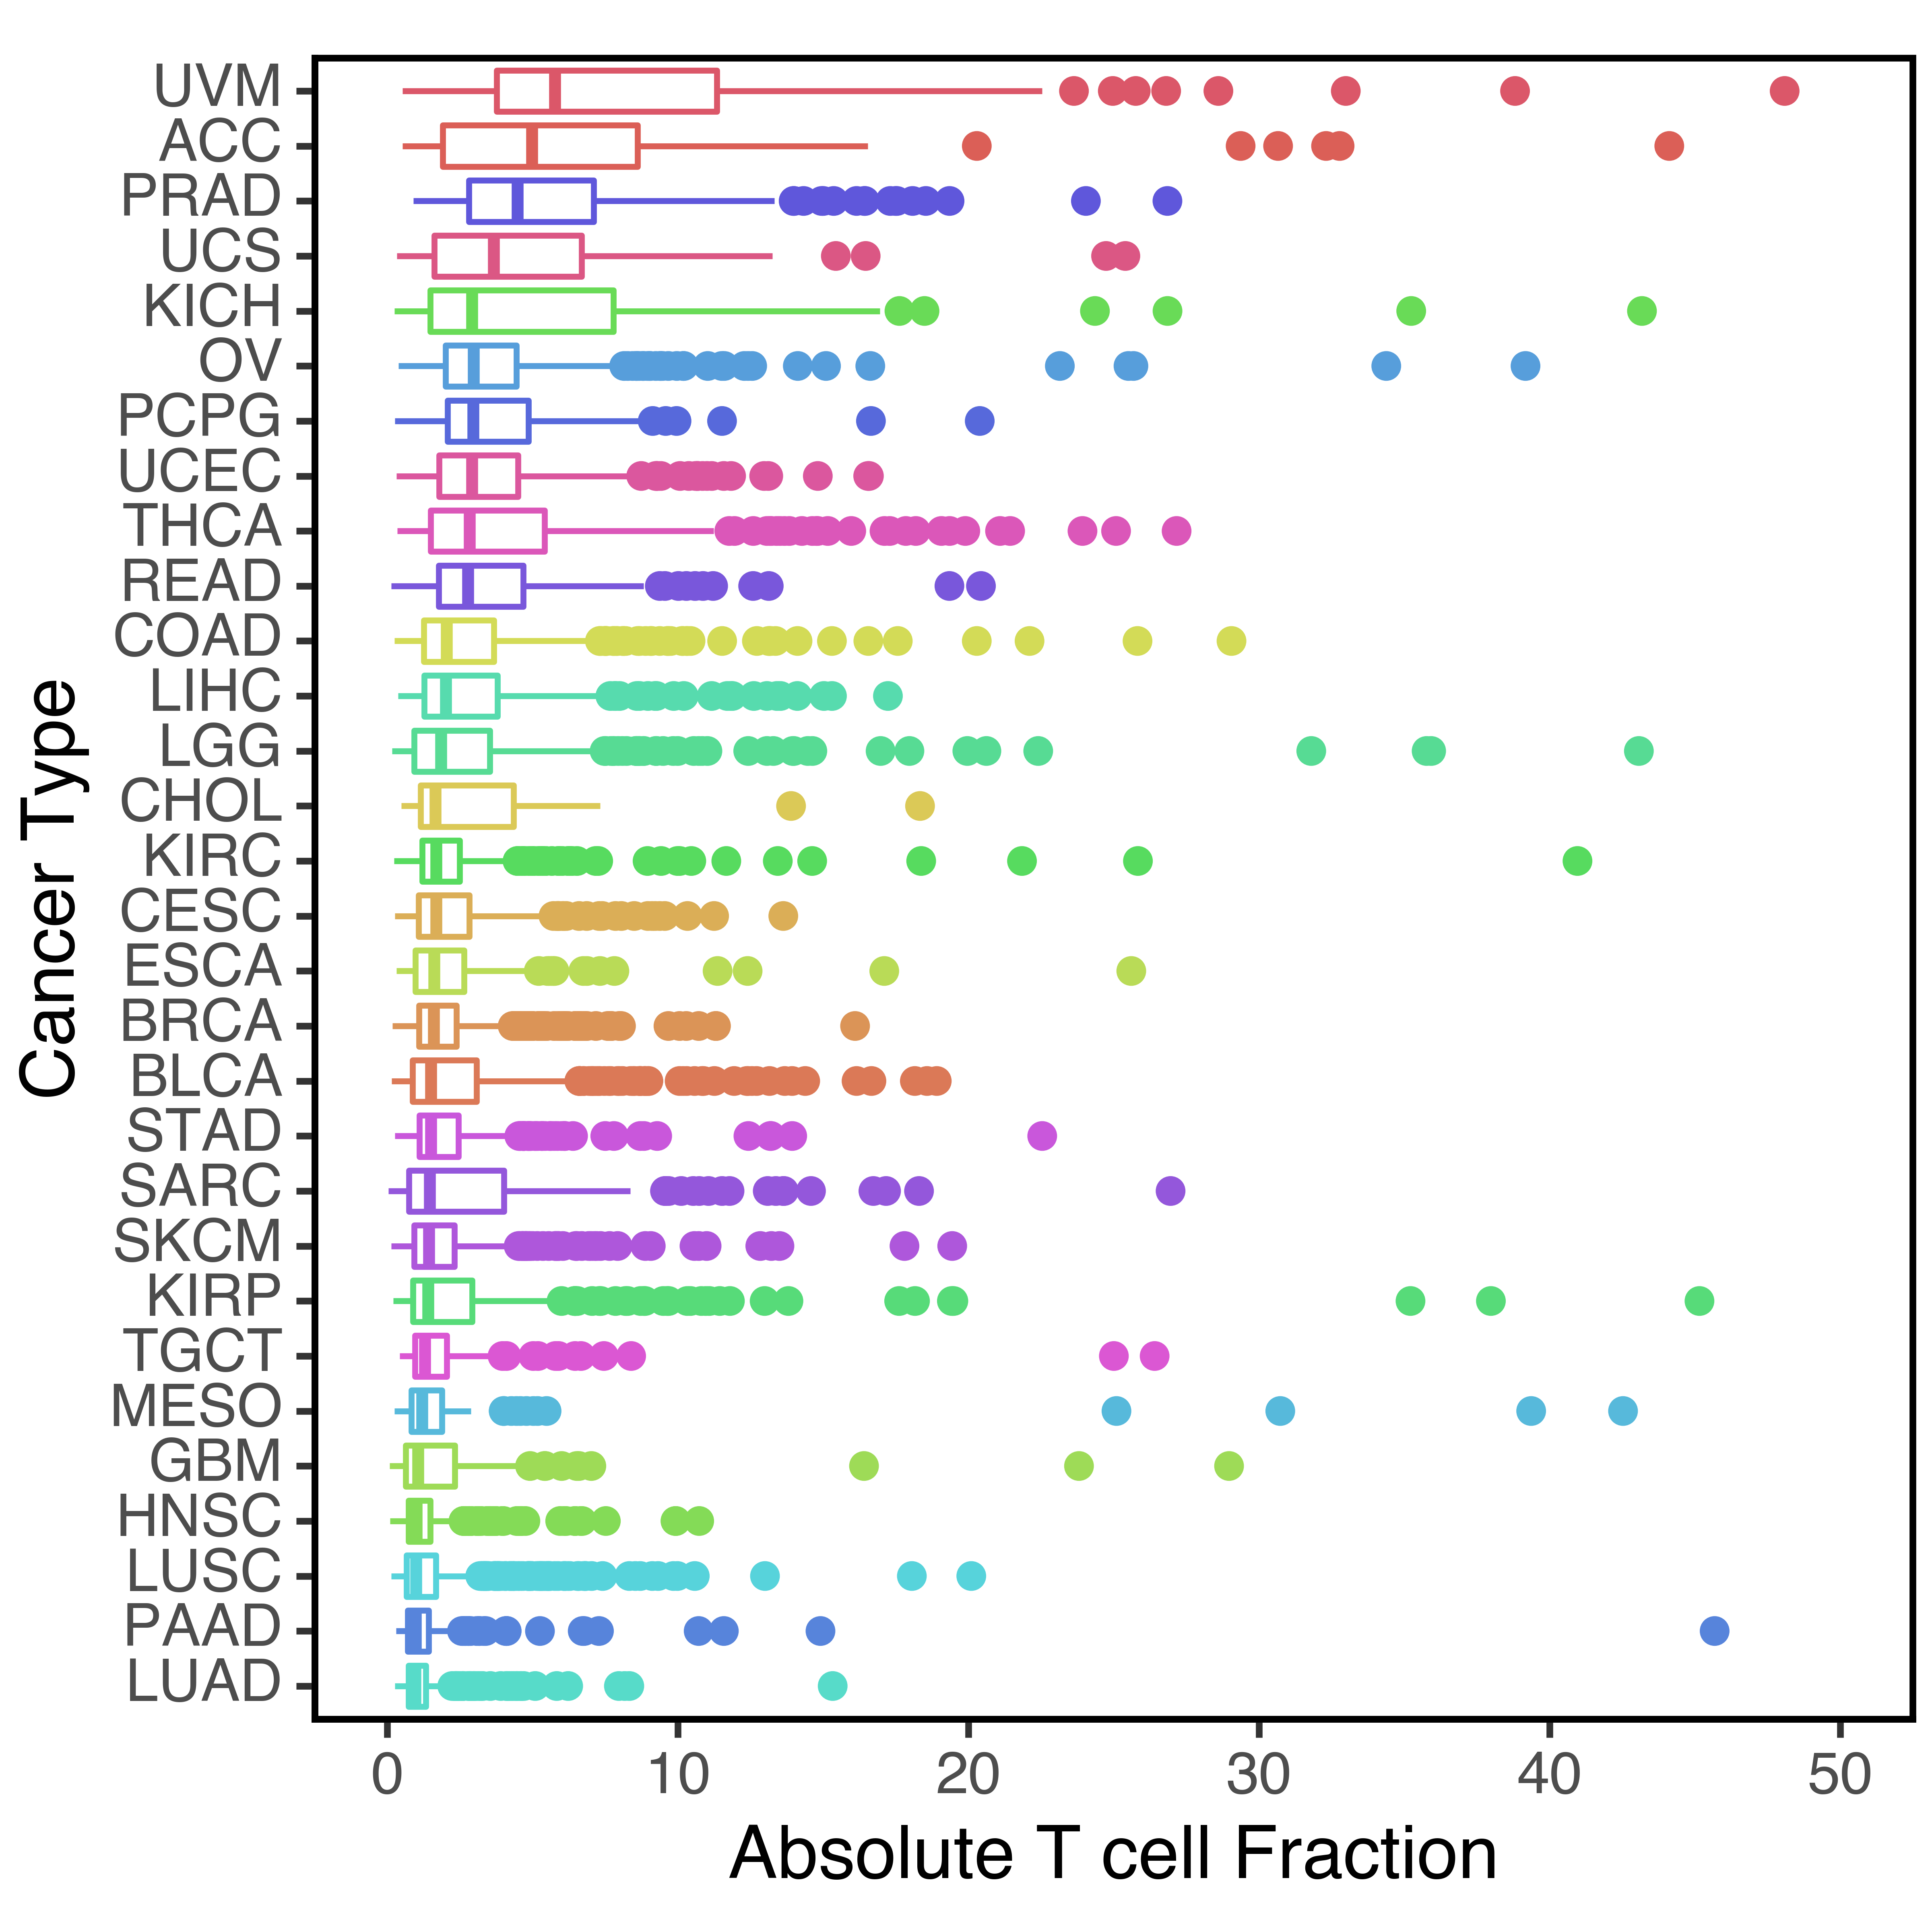

In [105]:
p9.options.dpi = 600
p9.options.figure_size = (4,4)


T_infil = (
    p9.ggplot(filter_combined)+
    p9.aes(x='CancerType', y='T_cells', color = 'CancerType')+
    p9.geom_boxplot(filter_combined)+
    p9.labels.labs(x = 'Cancer Type', y = 'Absolute T cell Fraction')+
    p9.scales.ylim(0,50)+
    p9.scale_color_discrete(guide = False)+
    p9.scale_x_discrete(limits = cancertype_list)+
    p9.coord_flip()+
    p9.scale_fill_brewer(palette=3)+
    p9.theme_classic()+p9.theme(
        panel_border=p9.element_rect(color = "black")
        )
)


print(T_infil)

### Question 5. Get the median level of immune infiltration of B_cells, T_cells, NK_cells, Monocytes, Macrophages, DCs, Mast and Eosinophils per cancer type and plot them in a heatmap

Here we will use Seaborn to construct a quick and easy heatmap, however we can use other plotting packages as well. It is all preference. 

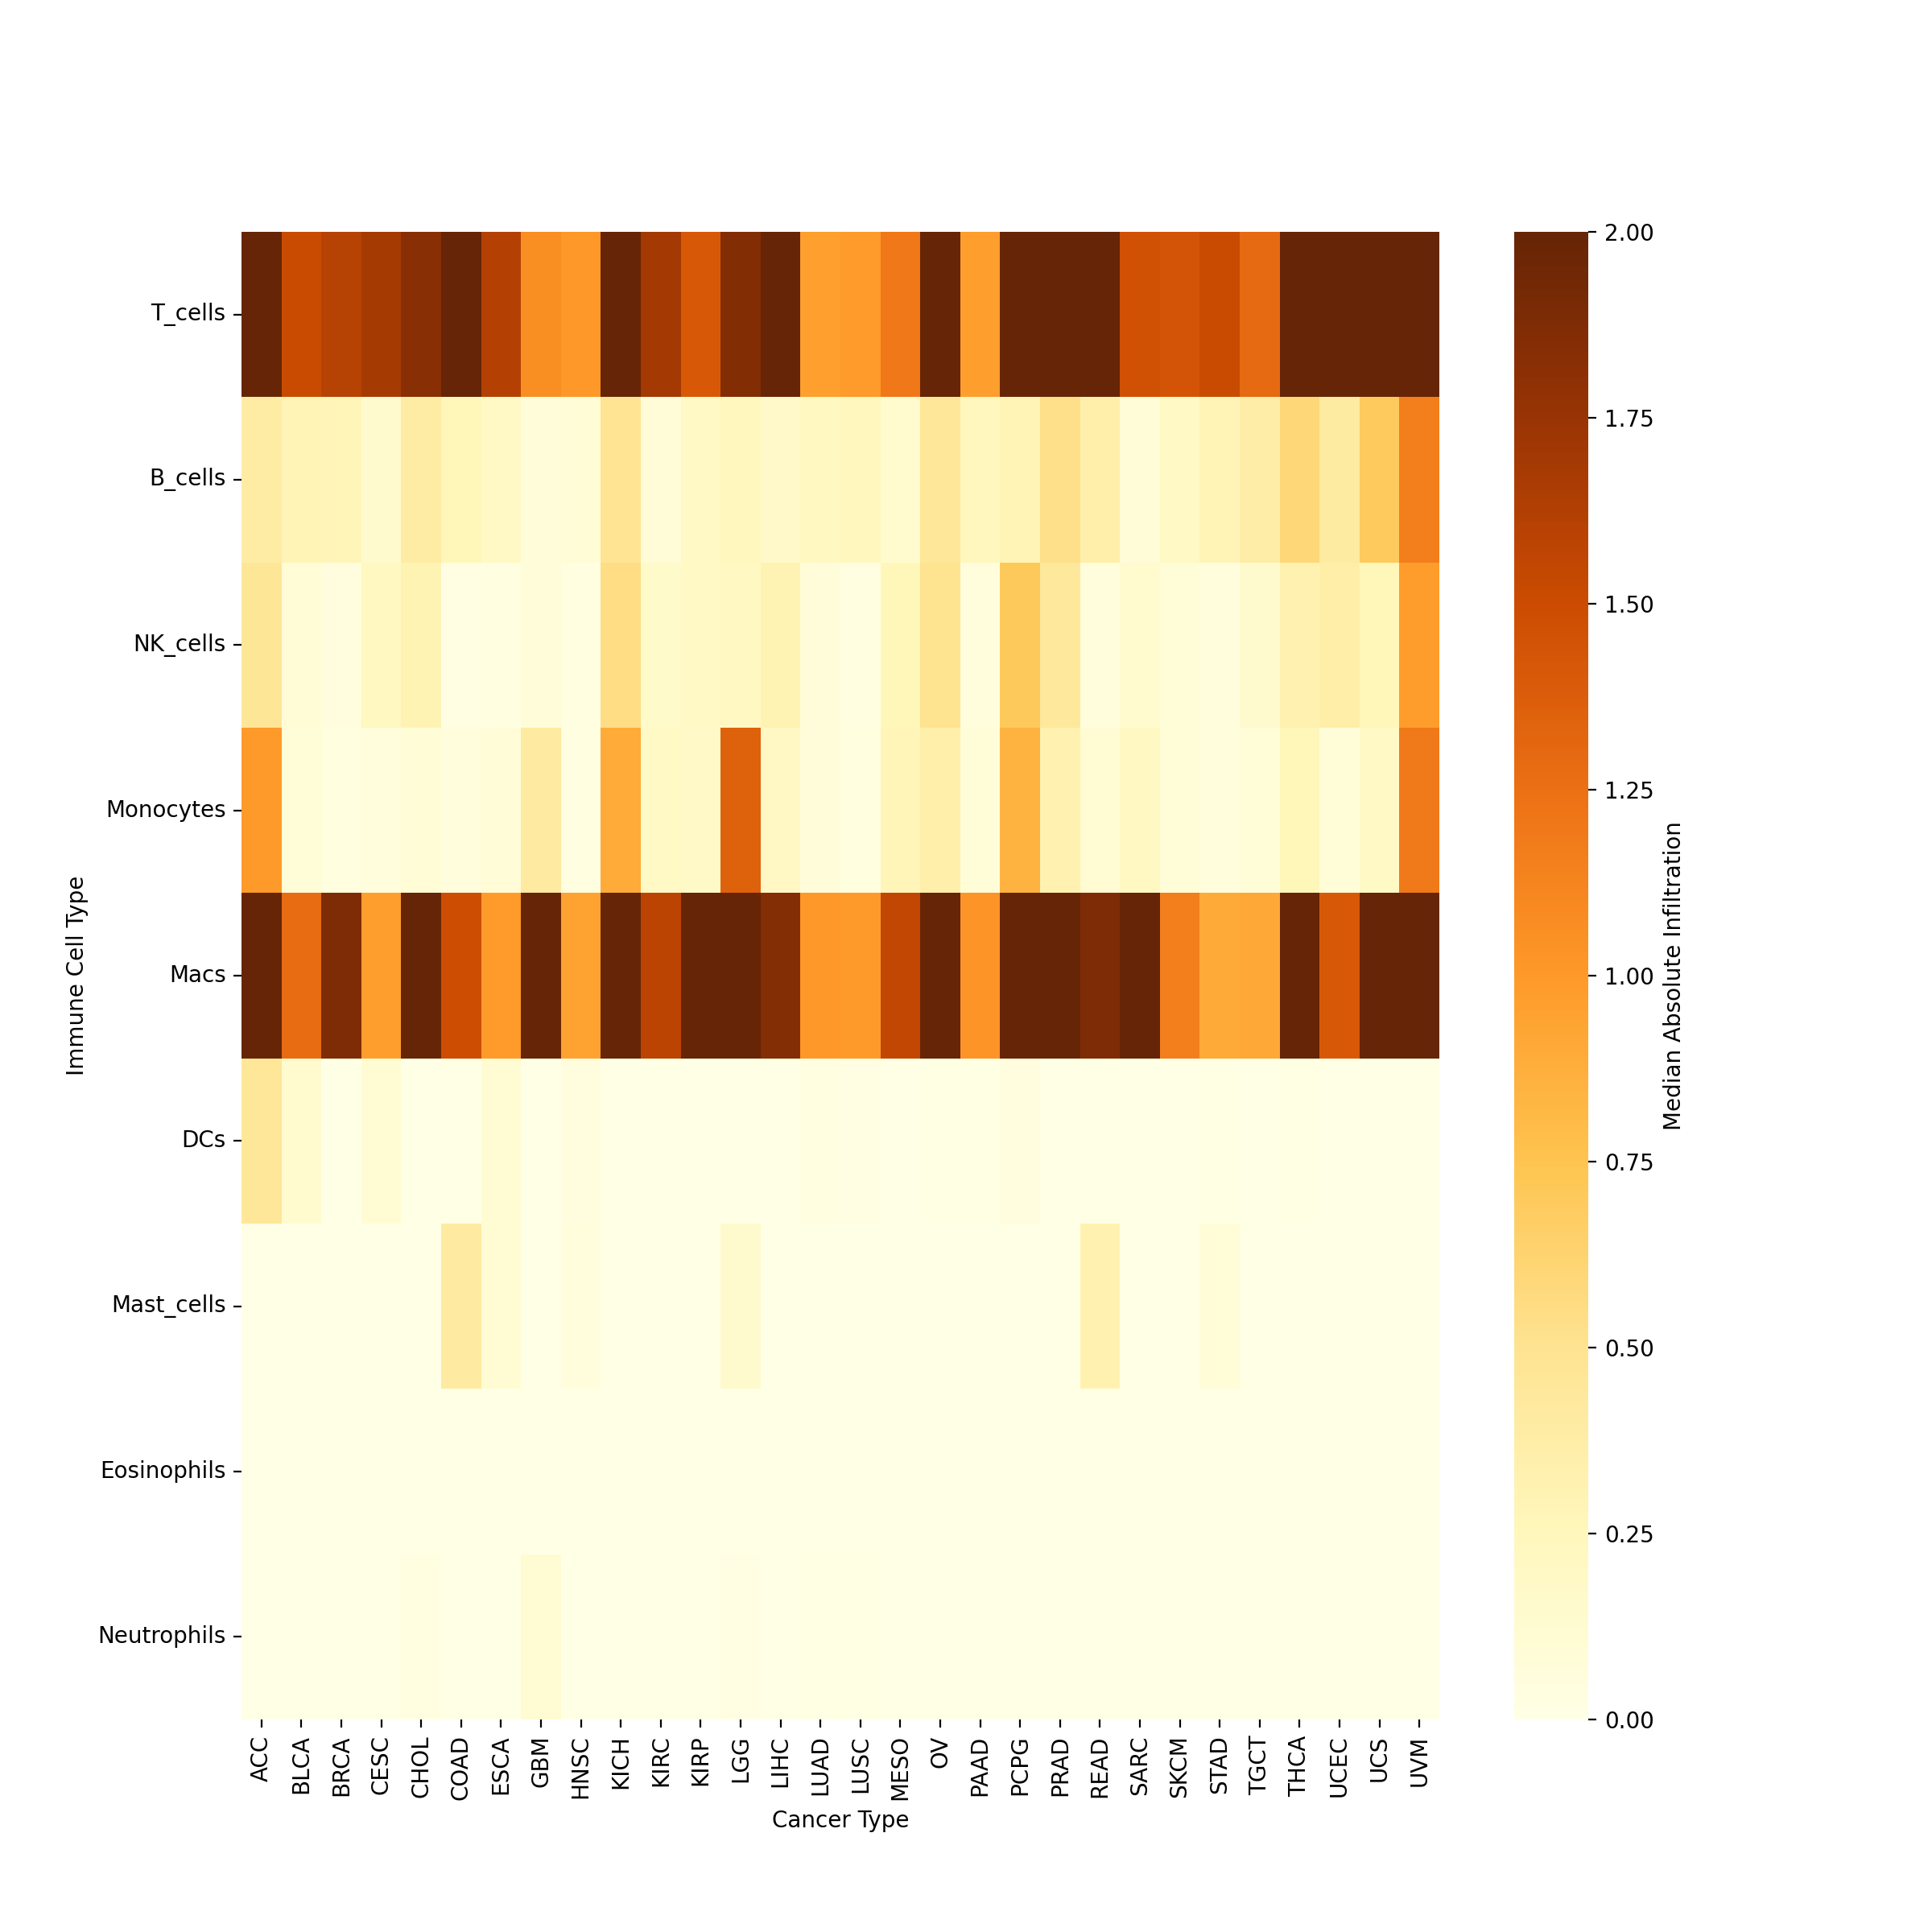

In [ ]:
plt.subplots(figsize = (12,12))
heatmap = sns.heatmap(medianvalues, vmax=2, cmap='YlOrBr', cbar_kws={'label':'Median Absolute Infiltration'}) 
heatmap.set(xlabel ="Cancer Type", ylabel="Immune Cell Type")
heatmap.tick_params(axis='y', rotation=0)
plt.show()